Data sets format: 
files:
* TotalFlights.csv
* DelayFlights.csv
* DelayRatio.csv
* airport2idx.csv
* time_stamp2idx.csv
* test.csv
* readme.ipynb

this.ipynb provide helper function and a top class `GraphFlow` object  `gf` to generate the following data:

* `gf.TotalFlights`: pd.DataFrame with value  of shape (N,A)

`gf.TotalFlights[t,i]` is number of flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayFlights`: pd.DataFrame with value of shape (N,A)

`gf.DelayFlights[t,i]` is number of delayed flights between [`idx2time_stamp[t]`,`idx2time_stamp[t] + dt`) at airport `idx2airport[i]`

* `gf.DelayRatio`:  pd.DataFrame with value of shape (N,A)

`gf.DelayRatio[t,i] = DelayFlights[t,i] / TotalFlights[t,i]`

* `gf.RealTotalFlights`,`gf.RealDelayFlights`,`gf.RealDelayRatio`: pd.DataFrame with same value but with real index

* `gf.idx2airport`: dict 

`gf.idx2airport[i]` return  the iata name for airport index ` i `

* `gf.airport2idx`: dict

inverse to `idx2airport`

* `gf.idx2time_stamp`: dict

`gf.idx2time_stamp[t]` return  the timestamp for time index ` t `

* `gf.time_stamp2idx`: dict

inverse to `idx2time_stamp[t]`

* `gf.dt`:pd.TimeDelta 

`1D` or `1H` so far

* `test_index` :list of lenth M
element is time index at which model predicts the delay ratio. In our case, all elements `tidx in test_index`' satisfy `idx2time_stamp[tidx]` after `2018-01-01 00:00:00`

* `gf.G` :  nx.DiGraph with edges having weight attr as the total flights in  time range.

* `gf.pre_data` provide pre-cleaned raw data in time range.



`readme.ipynb` also provide a model evaluation function `model_evaluation(pred_data)`. 

* 1. run next block to generate data
* 2. tune your model, generate a np.ndarrays obeject `pred_data` of shape  `(M,A)`
`pred_data[j,:]` gives the predicted delay ratio for time index `test_index[j]`
* 3. report `model_mse(pred_data)`, save `pred_data`

`readme.ipynb`  provide some helper functions. 

* `gf.describe()` : describe the current GraphFlow obeject

* `gf.real_format(df)` : convert a dataframe into colums by timeseris and index by airports names
* `gf.draw_network_attr(nodes_attr= None,edges_attr='weight',size=10,with_pos=True)` :  draw undirected graph `fun_1_to_undir_G(G)` try several times to get a better display

* `gf.sub_graph_flow(start_time,end_time,sub_nodes = None)` : 

** Generate a sub  graph flow. In this case all 'DataFrame' including `TotalFlights`,`DelayFlights`,`DelayRatio` will be re-computed as sub_nodes will build a smaller GraphFlow. This genertion speed is very slow. 2 min per airport

** If `sub_nodes` is `None`, `gf.sub_graph_flow` can compute very fast as no dataframe will be reproduced.

## Multi-linear regression task for ArrDelayFlights for a given airport.

Using the material https://newonlinecourses.science.psu.edu/stat501/lesson/welcome-stat-501 Lesson 5,6,7,9,10. To do a multiMulti linear regression.

* 1.Choose four representive airports (One 'LAX', one other big airport, one middle, one small airport) for each airport `a` and `gf.dt` do the following.
* 2. The responce is the `gf.DepDelayFlights[t,a]` which stands for the numbr of ArrDelayFlights for `a` between `t` and `t`+`gf.dt`, where `t` takes values in `gf.grid`and `t` later than `2018/01/01`
* 3. The predictors are chosen manully. Here is general rules:
* 3.1 all predictors should be obtained before or at `t` 
* 3.2 here are some candidates: 
* 3.2.1 timeseries flavored predictors : lags `gf.ArrDelayFlights[t-1,a]`,`gf.ArrDelayFlights[t-2,a]`,..., 
* 3.2.2 `gf.ArrDelayFlights[t-1,a]`, `t` correspoding time status `is_Tuesday`,`is_Monday`,..., `is_Weekend`, `is_Holiday`,`season`,
* 3.2.3 some constructed data: e.g. average of ArrDelayFlights at `t-1` for all airports which is the neighbour of `a`
* 4. about model building. try to understand the data and answer following question, which predictors best gives the best fit. If the fit is not good try to do the following

>If important predictor variables are omitted, see whether adding the omitted predictors improves the model.

>If the mean of the response is not a linear function of the predictors, try a different function. For example, polynomial regression involves transforming one or more predictor variables while remaining within the multiple linear regression framework. For another example, applying a logarithmic transformation to the response variable also allows for a nonlinear
relationship between the response and the predictors while remaining within the multiple linear regression framework.

>If there are unequal error variances, try transforming the response and/or predictor variables or use "weighted least squares regression."

>If an outlier exists, try using a "robust estimation procedure."

>If error terms are not independent, try fitting a "time series model."
> Try some data transformations

* 5 python,R either is ok only report is needed.






##  Coding instruction for gf.quotient_graph_flow(self, start_time,end_time,node_groups = None)
* 0. `start_time`,`end_time` are `str` nodes_groups is of type `**str`
* 1. Return a `GraphFlow` object `quo_gf` and `dict` object `group_names`
* 2. Do the following:
* 2.0 if not `node_groups` run gf.sub_graph(start_time,end_time)
* 2.1 check `node_groups` is a partition of `self.G.nodes` if not: raise error.
* 2.2 `quo_gf` has following data:
* 2.2.1 `quo_gf.G` has nodes with aritrary distinct names of `str` type(four letters maybe?), for each one node correspond to a group in `node_groups`, generate a dict `group_names` with key being node ,value is corresponding group in `node_groups`
* 2.2.11 node in `quo_gf.G` has no `weight` attr if it raise a problem contact Jiayin
* 2.2.12 node in `quo_gf.G` has `pos` attr ,randomly given (may use spring_layout)
* 2.2.21 edges`(a,b)` in `quo_gf.G.edges` has `weight` attr , the `sum` of number of flights in self.pre_data within `grid`
check sub_graph to see how to generate it using `start_time`,`end_time`.
* 2.2.22 edges`(a,b)` in `quo_gf.G.edges` has `distance` attr , the `mean` of `Distance` of flights in self.pre_data within `grid`(one may use approximation to faster this computation,weighted sum of distance in self.G.edges?)
check `sub_graph_flow()` to see how to generate it using `start_time`,`end_time`.
* 2.2.3 `quo_gf.pre_data` has records `rec` in self.predata within `grid`, check `sub_graph_flow()` for within's meaning. `rec.Origin` should update to `a` if `rec.Origin` in `group_names[a]`. update `rec.Dest` similarly
* 2.2.4 generate other data in `quo_gf` accordingly. 

* 3. coding efficiently note that the nodes has size around 311 pre_data has size 14M.  if necessary reconstruct `fun_1_delay_rate()` as it is the bottle neck.
* 4. write a demo testing all available member function for `quo_gf`


In **this** notebook,  run `gf.describe()` to see general infomation
When using model to pridiction. one **CAN NOT** use the data at or after `idx2time_stamp[t]` to

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from datetime import datetime,timedelta
from pytz import timezone
from time import time

from collections import deque
from functools import reduce
from itertools import chain
  
def model_evaluation(pred_data,test_data=None):
    test_index=list(pd.read_csv("test.csv",index_col=0,header=None).values.T[0,:])
    DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0)
    return np.mean(np.mean(np.square(DelayRatio.fillna(0).iloc[:,test_index].T-pred_data),axis=0))

In [226]:
class GraphFlow:
    #================= 08/16/19 maintained by Jiayin Guo=============
    def __init__(self,idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,grid = None ,start_time = None,end_time = None,DelayRatio=None):
        self.idx2airport = idx2airport
        self.airport2idx = airport2idx
        self.idx2time_stamp = idx2time_stamp
        self.time_stamp2idx = time_stamp2idx
        self.TotalFlights = TotalFlights
        self.DelayFlights = DelayFlights
        self.G = G
        self.pre_data=pre_data
        self.dt = dt
        
        #=========== self.grid=============
        if grid is not None:
            self.grid = grid
        elif (start_time is not None) & (end_time is not None):
            self.grid = pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        else:
            raise
        #=========== self.DelayRatio=============
        if DelayRatio is not None:
            self.DelayRatio = DelayRatio
        else:
            print(DelayFlights.shape)
            print(TotalFlights.shape)
            self.DelayRatio = pd.DataFrame(data=DelayFlights.values/TotalFlights.values,index=DelayFlights.index,
                   columns=DelayFlights.columns)
            
        #=================self.RealDelayRatio,RealTotalFlights,RealDelayFlights====
        self.RealDelayRatio = self.DelayRatio.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealDelayFlights = self.DelayFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
        self.RealTotalFlights = self.TotalFlights.rename(index = self.idx2time_stamp).rename(columns = self.idx2airport)
            
        
        return
          
    def draw_network_attr(self, nodes_attr = None , edges_attr = 'weight' , size = 6 , with_pos = True):
        plt.figure(1,figsize=(size,size))
        G=self.to_undir_G(self.G)
        if nodes_attr == 'TimeModifyer':
            labels={node:value.total_seconds()/3600 for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr =='time_zone':
            labels={node:value.split('/')[1] for node,value in nx.get_node_attributes(G,nodes_attr).items()}
        elif nodes_attr is None:
            labels=None
        else:
            raise  
       
        pos=nx.get_node_attributes(G,'pos')
        if not with_pos:
            pos=nx.spring_layout(G)
        nx.draw(G,pos=pos,labels = labels)
        nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=nx.get_edge_attributes(G,edges_attr))
        plt.show()
        return

    def real_format(self,df):
        return df.rename(columns = self.idx2time_stamp).rename(index = self.idx2airport)
    
    def slice(self,start_time,end_time):
        idx2airport = self.idx2airport
        airport2idx = self.airport2idx
        idx2time_stamp = self.idx2time_stamp
        time_stamp2idx =self. time_stamp2idx
        dt = self.dt
        grid =  pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        G = self.G
        # potencial bug: weight is wrong
        pre_data = self.pre_data[(self.pre_data.AbsArrTime >= str(grid[0])) &
                         (self.pre_data.AbsDepTime <= str(grid[-1]))]  
        TotalFlights = self.TotalFlights[(self.TotalFlights.index >= self.time_stamp2idx[grid[0]]) &
                                           (self.TotalFlights.index <= self.time_stamp2idx[grid[-1]])
                                          ]
        DelayFlights = self.DelayFlights[(self.DelayFlights.index >= self.time_stamp2idx[grid[0]]) &
                                           (self.DelayFlights.index <= self.time_stamp2idx[grid[-1]])
                                          ]
        
        return GraphFlow(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = grid)
        

    def sub_graph_flow(self, start_time = None , end_time = None ,sub_nodes = None, edges = None):
        idx2airport = self.idx2airport
        airport2idx = self.airport2idx
        idx2time_stamp = self.idx2time_stamp
        time_stamp2idx =self. time_stamp2idx
        dt = self.dt
        if start_time is None:
            stat_time = str(self.grid[0])[:-6]
            
        if start_time is None:
            end_time = str(self.grid[-1])[:-6]
            
        grid =  pd.date_range(start_time,end_time,freq=dt,tz=timezone('America/Los_Angeles'))
        
        
        # 1 generate new pre_data
        t=time()
        if sub_nodes is None:
            temp_sub_nodes=list(self.G.nodes)
        else:
            temp_sub_nodes = sub_nodes
            
        pre_data = self.pre_data[self.pre_data.Origin.isin(temp_sub_nodes) & 
                                 self.pre_data.Dest.isin(temp_sub_nodes) &
                                 (self.pre_data.AbsArrTime >= str(grid[0])) &
                                 (self.pre_data.AbsDepTime <= str(grid[-1]))]
        print("===============pre_data generated: ", t-time())
        
        # 2 use pre_data  to generate G
        
        if (sub_nodes is not None) & ((edges is not None)):
            print('TODO: sub_nodes and edges can not both None ')
            raise
        elif (sub_nodes is  None) & ((edges is None)):
            G = self.G .copy()
        elif sub_nodes is not None:
            edges = list(self.G.subgraph(sub_nodes).copy().edges)
        
         # 2.5 use edges and pre_data to generate G
            
        G = self.G.edge_subgraph(edges).copy()
        temp = pre_data.groupby(['Origin','Dest'],as_index=False)['Year'].count().rename(columns = {"Year": "weight"})
        nx.set_edge_attributes(G, temp.set_index(['Origin','Dest']).to_dict('index'))
        #print(dict(G.edges))
            

        # 3 use pre_data, G to generate TotalFlights, DelayFlights
        counter=0
        attrs=['TotalFlights','DelayFlights']
        dfs={x:[] for x in attrs}
        ans={}
        if (len(airport2idx)>0) & (len(time_stamp2idx)>0) & (len(idx2airport)>0) & (len(idx2time_stamp)>0) :
            for airport in G.nodes:
                print("=========Testing ",airport,"==========airports remains :", len(G.nodes)-counter,'========time lasted so far: ',time()-t)
                temp_raw=fun_1_delay_rate(airport,grid=grid,dt=dt,pre_data=pre_data,G=G)
                for attr in attrs:
                    temp=temp_raw[attr]
                    temp.index=map(lambda x: time_stamp2idx[x], temp.index)
                    temp.name=airport2idx[airport]
                    dfs[attr].append(temp)
                counter+=1
            for attr in attrs:   
                ans[attr]=pd.concat(dfs[attr],axis=1).sort_index(axis=1)    

            print('======================Total time:',time()-t)
            TotalFlights = ans['TotalFlights']
            TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
            TotalFlights.index=pd.to_numeric(TotalFlights.index)

            DelayFlights = ans['DelayFlights']
            DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
            DelayFlights.index=pd.to_numeric(DelayFlights.index)
        else:
            print('At least one dict is empty')
            print(len(airport2idx) ,len(time_stamp2idx) ,len(idx2airport) ,len(idx2time_stamp))
            raise
        
        return GraphFlow(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = grid)
            
        
    
    def quotient_graph_flow(self, sub_grid = None,nodes_groups = None):
        # TODO
        return
      
    def describe(self):
        print('dt :', self.dt)
        print('start time:', self.grid[0])
        print('start time:', self.grid[-1])
        print('All data frame has shape:', self.TotalFlights.shape)
        display(self.RealTotalFlights.head(3))
        display(self.pre_data.head(3))
        
        return
    def export_GF(self):
        #TODO
        return
    @classmethod
    def import_GF(cls,dt):
        idx2airport=pd.read_csv("idx2airport.csv",index_col=0)['0'].to_dict()
        airport2idx={y:x for x,y in idx2airport.items()}
        idx2time_stamp=pd.to_datetime(pd.read_csv("idx2time_stamp.csv",index_col=0)['0'],utc = True).dt.tz_convert('America/Los_Angeles').to_dict()
        time_stamp2idx={y:x for x,y in idx2time_stamp.items()}
        TotalFlights=pd.read_csv("TotalFlights.csv",index_col=0).T
        TotalFlights.index=pd.to_numeric(TotalFlights.index)
        TotalFlights.columns=pd.to_numeric(TotalFlights.columns)
        
        DelayFlights=pd.read_csv("DelayFlights.csv",index_col=0).T
        DelayFlights.index=pd.to_numeric(DelayFlights.index)
        DelayFlights.columns=pd.to_numeric(DelayFlights.columns)
        
        DelayRatio=pd.read_csv("DelayRatio.csv",index_col=0).T
        DelayRatio.index=pd.to_numeric(DelayRatio.index)
        DelayRatio.columns=pd.to_numeric(DelayRatio.columns)
        
        pre_data=pd.read_csv("pre_data.csv",index_col=0)
        G=nx.DiGraph()
        G.add_edges_from(pd.read_csv('graph_edges.csv',index_col=0).apply(lambda x:(x.source,x.target,{'Distance':x.Distance,'weight':x.weight}),axis=1))
        nx.set_node_attributes(G,pd.read_csv('graph_nodes.csv',index_col=0).apply(
            lambda x:{'pos':tuple(map(float,x.pos[1:-1].split(','))),'weight':x.time_zone},axis=1).to_dict())
        start_time = str(list(time_stamp2idx.keys())[0])[:-6]
        end_time = str(list(time_stamp2idx.keys())[-1])[:-6]
        
  
        return cls(idx2airport,airport2idx,idx2time_stamp,time_stamp2idx,TotalFlights,DelayFlights,pre_data,G,dt,
                   grid = None ,start_time = start_time,end_time = end_time , DelayRatio=DelayRatio)
    @classmethod
    def to_undir_G(cls,G):
        G_new=G.to_undirected()
        def swap(edge):
            return (edge[1],edge[0])
        for edge in G_new.edges:
            G_new.edges[edge]['Distance'] = 0
            G_new.edges[edge]['weight'] = 0
            if edge in G:
                G_new.edges[edge]['Distance']+=G.edges[edge]['Distance'] 
                G_new.edges[edge]['weight'] += G.edges[edge]['weight']
            if swap(edge) in G:
                G_new.edges[edge]['Distance']+=G.edges[swap(edge)]['Distance'] 
                G_new.edges[edge]['weight'] += G.edges[swap(edge)]['weight']
            G_new.edges[edge]['Distance']/=2
            #G_new.edges[edge]['TotalNumberinRange'] = G.edges[edge]['TotalNumberinRange'] + G.edges[swap(edge)]['TotalNumberinRange']
        return G_new
    
   # analysis_1 = my_analysis_1
    
def fun_1_delay_rate(airport,grid,dt,pre_data,G):
    t=time()
    #pre_data=pd.read_csv("Data/pre_timeseries.csv")
    print('loading finished:' ,time()-t)
    
    
    data=fun_1_ts_gen(pre_data,G,airport)
    
    delay_data=data[(data.ArrDelay>15) | (data.DepDelay>15)]
    
    if data.empty:
        print('total_data is empty')
        total_series=pd.Series(data=[0]*len(grid),index=grid,name='TotalFlights')
    else:
        total_series=fun_1_counter(pd.to_datetime(data.index),grid,dt).rename('TotalFlights')
    
    if delay_data.empty:
        print('delay_data is empty')
        delay_series=pd.Series(data=[0]*len(grid),index=grid,name='DelayFlights')
    else:
        delay_series=fun_1_counter(pd.to_datetime(delay_data.index),grid,dt).rename('DelayFlights')
    
    res=pd.concat([total_series,delay_series],axis=1)
    
    res['DelayRatio']=res.apply(lambda x: x.DelayFlights/x.TotalFlights,axis=1)
   
    return  res

def fun_1_ts_gen(data,G,airport,verbose=False):
    t=time()
    depdf=data[data.Origin == airport].set_index('AbsDepTime').rename_axis(None)
    depdf['Leaving']=[True]*len(depdf)
    print('AbsDepTime columnn generated:',time()-t)
    
    arrdf=data[data.Dest == airport].set_index('AbsArrTime').rename_axis(None)
    arrdf['Leaving']=[False]*len(arrdf)
    print('AbsArrTime columnn generated:',time()-t)
    
    res=pd.concat([depdf,arrdf],sort=False).sort_index(axis = 0)
    print('data concated:',time()-t)
    
    if not verbose:
        columns=[ 'Year',  'Month',  'DayofMonth' , 'AirTime' , 'TaxiIn' , 'TaxiOut']
        print('fun_1_ts_gen ended:',time()-t)
        return res.drop(columns=columns)
    print('fun_1_ts_gen ended:',time()-t)
    return res

def fun_1_counter(ts_raw_data,grid,dt):# covolution of delta)[t,t+dt) for t in grid
    t=time()
    if ts_raw_data.empty:
        raise
    if grid.empty:
        raise
    covolution=[]
    interval=deque()
    r_idx=0
    for ts in grid:
        while r_idx<len(ts_raw_data) and ts_raw_data[r_idx]<ts+dt :
            interval.append(ts_raw_data[r_idx])
            #print('append',ts_raw_data[r_idx])
            r_idx+=1
        
        while interval and interval[0]< ts+dt-pd.to_timedelta(grid.freq):
        #print('pop:',interval.popleft())
            interval.popleft()
        #print(interval)
        covolution.append(len(interval))
    print('counter finished :',time()-t)
    return pd.Series(covolution,index=grid)

In [227]:
#Demo 1
dt = timedelta(seconds=3600)
gf = GraphFlow.import_GF(dt)

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


dt : 1:00:00
start time: 2007-01-01 00:00:00-08:00
start time: 2008-12-30 00:00:00-08:00
All data frame has shape: (17497, 311)


,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
2007-01-01 00:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-01 01:00:00-08:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-01 02:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
0,2007,1,1,1232,1341,1,7,SMF,ONT,54,4,11,2007-01-01 12:32:00-08:00,2007-01-01 13:41:00-08:00
1,2007,1,1,1918,2043,8,13,SMF,PDX,74,5,6,2007-01-01 19:18:00-08:00,2007-01-01 20:43:00-08:00
2,2007,1,1,2206,2334,34,36,SMF,PDX,73,6,9,2007-01-01 22:06:00-08:00,2007-01-01 23:34:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


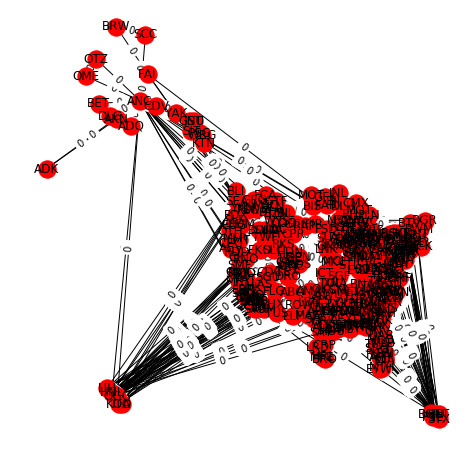

In [228]:
#Demo 1 continued
gf.describe()
gf.draw_network_attr(with_pos = True)

In [229]:
# Demo 2 one can use sub_graph_flow to generate sub_graph_flow
sub_nodes=set(list(gf.G.nodes)[:4])
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = sub_nodes )

===============pre_data generated:  -2.2270469665527344
=========Testing  BWI ==========airports remains : 4 ========time lasted so far:  2.23602294921875
loading finished: 0.0
AbsDepTime columnn generated: 0.002991914749145508
AbsArrTime columnn generated: 0.00498652458190918
data concated: 0.008975982666015625
fun_1_ts_gen ended: 0.009973287582397461
counter finished : 0.2154521942138672
counter finished : 0.0678260326385498
=========Testing  ABE ==========airports remains : 3 ========time lasted so far:  2.6120498180389404
loading finished: 0.0
AbsDepTime columnn generated: 0.001997232437133789
AbsArrTime columnn generated: 0.003989219665527344
data concated: 0.005984067916870117
fun_1_ts_gen ended: 0.005984067916870117
counter finished : 0.0628352165222168
counter finished : 0.031914710998535156
=========Testing  CLE ==========airports remains : 2 ========time lasted so far:  2.7556660175323486
loading finished: 0.0
AbsDepTime columnn generated: 0.0029964447021484375
AbsArrTime col

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.0049896240234375
data concated: 0.007979154586791992
fun_1_ts_gen ended: 0.007979154586791992
counter finished : 0.14960098266601562
counter finished : 0.06782174110412598
=========Testing  ATL ==========airports remains : 1 ========time lasted so far:  3.0468876361846924
loading finished: 0.0
AbsDepTime columnn generated: 0.002020120620727539
AbsArrTime columnn generated: 0.003989219665527344
data concated: 0.008005857467651367
fun_1_ts_gen ended: 0.009007930755615234


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.17350482940673828
counter finished : 0.07978439331054688
======================Total time: 3.381983995437622
(673, 4)
(673, 4)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 4)


,ABE,ATL,BWI,CLE
2007-02-01 01:00:00-08:00,0,0,0,0
2007-02-01 02:00:00-08:00,0,0,0,0
2007-02-01 03:00:00-08:00,2,0,3,1


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
624022,2007,2,2,703,823,-2,-2,BWI,CLE,57,6,17,2007-02-02 04:03:00-08:00,2007-02-02 05:23:00-08:00
624023,2007,2,2,1328,1445,0,-2,BWI,CLE,61,6,10,2007-02-02 10:28:00-08:00,2007-02-02 11:45:00-08:00
624024,2007,2,2,2255,9,154,155,BWI,CLE,60,6,8,2007-02-02 19:55:00-08:00,2007-02-02 21:09:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


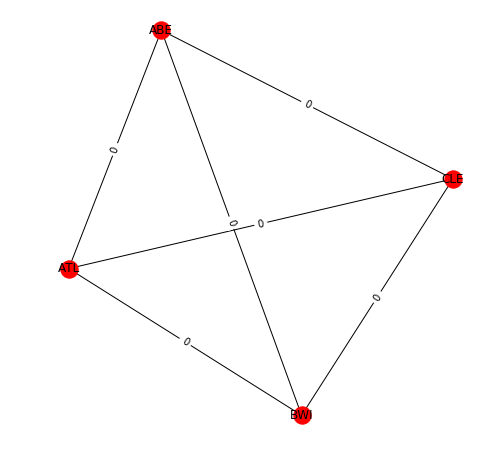

In [230]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = False)

In [194]:
# Demo 3 if sub_nodes is none,edges is None,then choose all_nodes,. ~ 4min
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = None)
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)

===============pre_data generated:  -2.248657464981079
{('ABE', 'ATL'): {'Distance': 692, 'weight': 71}, ('ABE', 'BWI'): {'Distance': 121, 'weight': 1}, ('ABE', 'CLE'): {'Distance': 339, 'weight': 67}, ('ABE', 'CLT'): {'Distance': 481, 'weight': 27}, ('ABE', 'CVG'): {'Distance': 503, 'weight': 65}, ('ABE', 'DTW'): {'Distance': 424, 'weight': 71}, ('ABE', 'ORD'): {'Distance': 654, 'weight': 92}, ('ATL', 'ABE'): {'Distance': 692, 'weight': 72}, ('ATL', 'ABQ'): {'Distance': 1269, 'weight': 82}, ('ATL', 'ABY'): {'Distance': 146, 'weight': 98}, ('ATL', 'ACY'): {'Distance': 678, 'weight': 50}, ('ATL', 'AEX'): {'Distance': 500, 'weight': 79}, ('ATL', 'AGS'): {'Distance': 143, 'weight': 153}, ('ATL', 'ALB'): {'Distance': 852, 'weight': 102}, ('ATL', 'ANC'): {'Distance': 3417, 'weight': 224}, ('ATL', 'APF'): {'Distance': 540, 'weight': 68}, ('ATL', 'ASE'): {'Distance': 1304, 'weight': 14}, ('ATL', 'ATW'): {'Distance': 765, 'weight': 75}, ('ATL', 'AUS'): {'Distance': 813, 'weight': 74}, ('ATL', 

AbsArrTime columnn generated: 0.05482172966003418
data concated: 0.05881071090698242
fun_1_ts_gen ended: 0.05881071090698242
counter finished : 0.11469459533691406
counter finished : 0.057845354080200195
=========Testing  ATL ==========airports remains : 310 ========time lasted so far:  2.6775431632995605
loading finished: 0.0
AbsDepTime columnn generated: 0.036869049072265625
AbsArrTime columnn generated: 0.07277321815490723
data concated: 0.135606050491333
fun_1_ts_gen ended: 0.13660287857055664


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 4.990693092346191
counter finished : 1.4790794849395752
=========Testing  BWI ==========airports remains : 309 ========time lasted so far:  10.790858030319214
loading finished: 0.0
AbsDepTime columnn generated: 0.02892327308654785
AbsArrTime columnn generated: 0.05884218215942383
data concated: 0.0747990608215332
fun_1_ts_gen ended: 0.0747990608215332


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.4002583026885986
counter finished : 0.4338400363922119
=========Testing  CLE ==========airports remains : 308 ========time lasted so far:  13.087717771530151
loading finished: 0.0
AbsDepTime columnn generated: 0.029922008514404297
AbsArrTime columnn generated: 0.05884671211242676
data concated: 0.07280659675598145
fun_1_ts_gen ended: 0.07280659675598145


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.1379590034484863
counter finished : 0.4248642921447754
=========Testing  CLT ==========airports remains : 307 ========time lasted so far:  15.05243468284607
loading finished: 0.0
AbsDepTime columnn generated: 0.03294944763183594
AbsArrTime columnn generated: 0.06485247611999512
data concated: 0.09179878234863281
fun_1_ts_gen ended: 0.09179878234863281


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.6745250225067139
counter finished : 0.6671760082244873
=========Testing  CVG ==========airports remains : 306 ========time lasted so far:  17.993605136871338
loading finished: 0.0
AbsDepTime columnn generated: 0.028891324996948242
AbsArrTime columnn generated: 0.05884265899658203
data concated: 0.07476925849914551
fun_1_ts_gen ended: 0.07476925849914551


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.4800441265106201
counter finished : 0.574465274810791
=========Testing  DTW ==========airports remains : 305 ========time lasted so far:  20.564733743667603
loading finished: 0.0
AbsDepTime columnn generated: 0.030916929244995117
AbsArrTime columnn generated: 0.06084775924682617
data concated: 0.0887300968170166
fun_1_ts_gen ended: 0.0887300968170166


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.340754270553589
counter finished : 1.0731582641601562
=========Testing  ORD ==========airports remains : 304 ========time lasted so far:  24.809398412704468
loading finished: 0.0
AbsDepTime columnn generated: 0.04188895225524902
AbsArrTime columnn generated: 0.07878804206848145
data concated: 0.13958477973937988
fun_1_ts_gen ended: 0.14058160781860352


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 4.519879579544067
counter finished : 2.1871538162231445
=========Testing  ABQ ==========airports remains : 303 ========time lasted so far:  33.18402600288391
loading finished: 0.0
AbsDepTime columnn generated: 0.027905702590942383
AbsArrTime columnn generated: 0.05582904815673828
data concated: 0.06181192398071289
fun_1_ts_gen ended: 0.06181192398071289


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.5585072040557861
counter finished : 0.18151521682739258


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  ABY ==========airports remains : 302 ========time lasted so far:  34.141003370285034
loading finished: 0.0
AbsDepTime columnn generated: 0.026927709579467773
AbsArrTime columnn generated: 0.054852962493896484
data concated: 0.05684781074523926
fun_1_ts_gen ended: 0.05684781074523926
counter finished : 0.052858591079711914
counter finished : 0.03390955924987793
=========Testing  ACY ==========airports remains : 301 ========time lasted so far:  34.32650709152222
loading finished: 0.0
AbsDepTime columnn generated: 0.026927947998046875


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


AbsArrTime columnn generated: 0.05385589599609375
data concated: 0.05983996391296387
fun_1_ts_gen ended: 0.05983996391296387
counter finished : 0.04787302017211914
counter finished : 0.03490638732910156
=========Testing  AEX ==========airports remains : 300 ========time lasted so far:  34.51300835609436
loading finished: 0.0
AbsDepTime columnn generated: 0.02801060676574707
AbsArrTime columnn generated: 0.05493807792663574
data concated: 0.05792832374572754
fun_1_ts_gen ended: 0.05792832374572754


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.1047220230102539
counter finished : 0.0438847541809082
=========Testing  AGS ==========airports remains : 299 ========time lasted so far:  34.77040433883667
loading finished: 0.0
AbsDepTime columnn generated: 0.026927471160888672
AbsArrTime columnn generated: 0.05285978317260742
data concated: 0.055863142013549805
fun_1_ts_gen ended: 0.055863142013549805
counter finished : 0.07080674171447754


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.03992509841918945
=========Testing  ALB ==========airports remains : 298 ========time lasted so far:  34.98482847213745
loading finished: 0.0


KeyboardInterrupt: 

In [231]:
# Demo 4 if sub_nodes is none,edges aregiven, then generate a subGraphFLow with edges given. ~ 3min
sub_gf = gf.sub_graph_flow('2007-02-01 01:00:00','2007-03-01 01:00:00',sub_nodes = None,edges = list(gf.G.in_edges('LAX')))

===============pre_data generated:  -2.5013153553009033
=========Testing  FLL ==========airports remains : 91 ========time lasted so far:  2.61600661277771
loading finished: 0.0
AbsDepTime columnn generated: 0.029954910278320312
AbsArrTime columnn generated: 0.05887484550476074
data concated: 0.07383537292480469
fun_1_ts_gen ended: 0.07383537292480469
counter finished : 1.0352237224578857
counter finished : 0.42589545249938965
=========Testing  SNA ==========airports remains : 90 ========time lasted so far:  4.4850428104400635
loading finished: 0.0
AbsDepTime columnn generated: 0.027927875518798828
AbsArrTime columnn generated: 0.056919097900390625
data concated: 0.06589579582214355
fun_1_ts_gen ended: 0.06589579582214355


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.7470035552978516
counter finished : 0.22240543365478516
=========Testing  OKC ==========airports remains : 89 ========time lasted so far:  5.745714426040649
loading finished: 0.0
AbsDepTime columnn generated: 0.02792525291442871
AbsArrTime columnn generated: 0.05684781074523926
data concated: 0.06283235549926758
fun_1_ts_gen ended: 0.06283235549926758


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.4089069366455078
counter finished : 0.15259218215942383
=========Testing  TUL ==========airports remains : 88 ========time lasted so far:  6.498701095581055
loading finished: 0.0
AbsDepTime columnn generated: 0.027925729751586914
AbsArrTime columnn generated: 0.056874752044677734
data concated: 0.061858415603637695
fun_1_ts_gen ended: 0.061858415603637695


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.38796377182006836
counter finished : 0.13763141632080078
=========Testing  LIH ==========airports remains : 87 ========time lasted so far:  7.210832118988037
loading finished: 0.0
AbsDepTime columnn generated: 0.02888798713684082
AbsArrTime columnn generated: 0.05781149864196777
data concated: 0.06180071830749512
fun_1_ts_gen ended: 0.06279706954956055


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.2742328643798828
counter finished : 0.0468747615814209
=========Testing  ANC ==========airports remains : 86 ========time lasted so far:  7.6775500774383545
loading finished: 0.0
AbsDepTime columnn generated: 0.02792525291442871
AbsArrTime columnn generated: 0.05585002899169922
data concated: 0.059839487075805664
fun_1_ts_gen ended: 0.059839487075805664
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.2792537212371826
counter finished : 0.11269855499267578
=========Testing  CLE ==========airports remains : 85 ========time lasted so far:  8.227128267288208
loading finished: 0.0
AbsDepTime columnn generated: 0.029961824417114258
AbsArrTime columnn generated: 0.05888199806213379
data concated: 0.0723879337310791
fun_1_ts_gen ended: 0.0723879337310791


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.0900864601135254
counter finished : 0.42685890197753906
=========Testing  GEG ==========airports remains : 84 ========time lasted so far:  10.160493612289429
loading finished: 0.0
AbsDepTime columnn generated: 0.027925968170166016
AbsArrTime columnn generated: 0.05485367774963379
data concated: 0.05884265899658203
fun_1_ts_gen ended: 0.05884265899658203


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.24933385848999023
counter finished : 0.09973335266113281
=========Testing  ORD ==========airports remains : 83 ========time lasted so far:  10.657167196273804
loading finished: 0.0
AbsDepTime columnn generated: 0.03690052032470703
AbsArrTime columnn generated: 0.07380223274230957
data concated: 0.1356363296508789
fun_1_ts_gen ended: 0.1356363296508789


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 4.342392206192017
counter finished : 2.1193339824676514
=========Testing  SBA ==========airports remains : 82 ========time lasted so far:  18.71662402153015
loading finished: 0.0
AbsDepTime columnn generated: 0.027926206588745117
AbsArrTime columnn generated: 0.05585169792175293
data concated: 0.060853004455566406
fun_1_ts_gen ended: 0.060853004455566406


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.2533259391784668
counter finished : 0.0827789306640625
=========Testing  PHL ==========airports remains : 81 ========time lasted so far:  19.19944930076599
loading finished: 0.0
AbsDepTime columnn generated: 0.028932809829711914
AbsArrTime columnn generated: 0.0588529109954834
data concated: 0.07480931282043457
fun_1_ts_gen ended: 0.07480931282043457


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.413177490234375
counter finished : 0.6064167022705078
=========Testing  BWI ==========airports remains : 80 ========time lasted so far:  21.73267960548401
loading finished: 0.0
AbsDepTime columnn generated: 0.030953407287597656
AbsArrTime columnn generated: 0.06186676025390625
data concated: 0.07779216766357422
fun_1_ts_gen ended: 0.07779216766357422


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.3164293766021729
counter finished : 0.4228696823120117
=========Testing  AUS ==========airports remains : 79 ========time lasted so far:  23.950705766677856
loading finished: 0.0
AbsDepTime columnn generated: 0.027958154678344727
AbsArrTime columnn generated: 0.05688047409057617
data concated: 0.06386494636535645
fun_1_ts_gen ended: 0.06386494636535645


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.6642153263092041
counter finished : 0.21738767623901367
=========Testing  TUS ==========airports remains : 78 ========time lasted so far:  25.090659379959106
loading finished: 0.0
AbsDepTime columnn generated: 0.027956485748291016
AbsArrTime columnn generated: 0.05588221549987793
data concated: 0.06186795234680176
fun_1_ts_gen ended: 0.06186795234680176


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.40993261337280273
counter finished : 0.14261794090270996
=========Testing  SGU ==========airports remains : 77 ========time lasted so far:  25.83370590209961
loading finished: 0.0
AbsDepTime columnn generated: 0.027936458587646484
AbsArrTime columnn generated: 0.055860042572021484
data concated: 0.06071949005126953
fun_1_ts_gen ended: 0.06071949005126953
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.09872579574584961
counter finished : 0.03693246841430664
=========Testing  MCI ==========airports remains : 76 ========time lasted so far:  26.081925630569458
loading finished: 0.0
AbsDepTime columnn generated: 0.027959823608398438
AbsArrTime columnn generated: 0.057875633239746094
data concated: 0.06785917282104492
fun_1_ts_gen ended: 0.06785917282104492


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.8248264789581299
counter finished : 0.27726030349731445
=========Testing  ABQ ==========airports remains : 75 ========time lasted so far:  27.49617648124695
loading finished: 0.0
AbsDepTime columnn generated: 0.02792525291442871
AbsArrTime columnn generated: 0.05785179138183594
data concated: 0.06482720375061035
fun_1_ts_gen ended: 0.06482720375061035


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.553511381149292
counter finished : 0.18151450157165527
=========Testing  COS ==========airports remains : 74 ========time lasted so far:  28.459601640701294
loading finished: 0.0
AbsDepTime columnn generated: 0.026927471160888672
AbsArrTime columnn generated: 0.05485367774963379
data concated: 0.05881142616271973
fun_1_ts_gen ended: 0.05881142616271973


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.24634313583374023
counter finished : 0.11070680618286133
=========Testing  OAK ==========airports remains : 73 ========time lasted so far:  28.96625018119812
loading finished: 0.0
AbsDepTime columnn generated: 0.02988719940185547
AbsArrTime columnn generated: 0.058840036392211914
data concated: 0.07080578804016113
fun_1_ts_gen ended: 0.07180666923522949


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.0551793575286865
counter finished : 0.3071761131286621
=========Testing  IYK ==========airports remains : 72 ========time lasted so far:  30.701608180999756
loading finished: 0.0
AbsDepTime columnn generated: 0.027924776077270508
AbsArrTime columnn generated: 0.05685114860534668
data concated: 0.059859275817871094
fun_1_ts_gen ended: 0.059859275817871094
counter finished : 0.043914079666137695
counter finished : 0.025931119918823242


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  SBP ==========airports remains : 71 ========time lasted so far:  30.871155977249146
loading finished: 0.0
AbsDepTime columnn generated: 0.027895450592041016
AbsArrTime columnn generated: 0.0578153133392334
data concated: 0.06084275245666504
fun_1_ts_gen ended: 0.061836957931518555
counter finished : 0.13463830947875977
counter finished : 0.046904802322387695
=========Testing  MEM ==========airports remains : 70 ========time lasted so far:  31.17335033416748
loading finished: 0.0
AbsDepTime columnn generated: 0.028919696807861328
AbsArrTime columnn generated: 0.05784249305725098
data concated: 0.07080769538879395
fun_1_ts_gen ended: 0.07080769538879395


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.166879653930664
counter finished : 0.3620321750640869
=========Testing  DEN ==========airports remains : 69 ========time lasted so far:  33.10917401313782
loading finished: 0.0
AbsDepTime columnn generated: 0.032920122146606445
AbsArrTime columnn generated: 0.06482696533203125
data concated: 0.10273385047912598
fun_1_ts_gen ended: 0.10273385047912598


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 3.0528476238250732
counter finished : 1.1040489673614502
=========Testing  SAT ==========airports remains : 68 ========time lasted so far:  38.28134894371033
loading finished: 0.0
AbsDepTime columnn generated: 0.02792644500732422
AbsArrTime columnn generated: 0.05585026741027832
data concated: 0.06283283233642578
fun_1_ts_gen ended: 0.06283283233642578


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.611365795135498
counter finished : 0.18949413299560547
=========Testing  ELP ==========airports remains : 67 ========time lasted so far:  39.327555656433105
loading finished: 0.0
AbsDepTime columnn generated: 0.02792215347290039
AbsArrTime columnn generated: 0.05485081672668457
data concated: 0.0598454475402832
fun_1_ts_gen ended: 0.0598454475402832


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.3570377826690674
counter finished : 0.1077125072479248
=========Testing  MFE ==========airports remains : 66 ========time lasted so far:  39.96681547164917
loading finished: 0.0
AbsDepTime columnn generated: 0.027953386306762695
AbsArrTime columnn generated: 0.05488443374633789
data concated: 0.05784320831298828
fun_1_ts_gen ended: 0.05784320831298828
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.11967992782592773
counter finished : 0.043883562088012695
=========Testing  STL ==========airports remains : 65 ========time lasted so far:  40.24210858345032
loading finished: 0.0
AbsDepTime columnn generated: 0.029920578002929688
AbsArrTime columnn generated: 0.05784463882446289
data concated: 0.06781792640686035
fun_1_ts_gen ended: 0.06781792640686035


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.8956069946289062
counter finished : 0.2732686996459961
=========Testing  SDF ==========airports remains : 64 ========time lasted so far:  41.73412013053894
loading finished: 0.0
AbsDepTime columnn generated: 0.02693033218383789
AbsArrTime columnn generated: 0.054853200912475586
data concated: 0.058844804763793945
fun_1_ts_gen ended: 0.059839487075805664


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.3231368064880371
counter finished : 0.1376323699951172
=========Testing  OXR ==========airports remains : 63 ========time lasted so far:  42.36041593551636
loading finished: 0.0
AbsDepTime columnn generated: 0.027963876724243164
AbsArrTime columnn generated: 0.05588054656982422
data concated: 0.058872222900390625
fun_1_ts_gen ended: 0.058872222900390625
counter finished : 0.053856849670410156
counter finished : 0.024939775466918945


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  ATL ==========airports remains : 62 ========time lasted so far:  42.53797245025635
loading finished: 0.0
AbsDepTime columnn generated: 0.041907548904418945
AbsArrTime columnn generated: 0.0827479362487793
data concated: 0.14557981491088867
fun_1_ts_gen ended: 0.1465752124786377
counter finished : 4.785211086273193
counter finished : 1.583761215209961
=========Testing  JFK ==========airports remains : 61 ========time lasted so far:  50.483734130859375
loading finished: 0.0
AbsDepTime columnn generated: 0.028922319412231445
AbsArrTime columnn generated: 0.05884146690368652
data concated: 0.07679533958435059
fun_1_ts_gen ended: 0.07679533958435059


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.5548434257507324
counter finished : 0.7130894660949707
=========Testing  RDU ==========airports remains : 60 ========time lasted so far:  53.327133655548096
loading finished: 0.0
AbsDepTime columnn generated: 0.027924299240112305
AbsArrTime columnn generated: 0.05585122108459473
data concated: 0.06583237648010254
fun_1_ts_gen ended: 0.06583237648010254


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.8497283458709717
counter finished : 0.3141927719116211
=========Testing  IAD ==========airports remains : 59 ========time lasted so far:  54.810168981552124
loading finished: 0.0
AbsDepTime columnn generated: 0.02892303466796875


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


AbsArrTime columnn generated: 0.05981111526489258
data concated: 0.07676529884338379
fun_1_ts_gen ended: 0.07676529884338379
counter finished : 1.2825725078582764
counter finished : 0.522599458694458
=========Testing  MDW ==========airports remains : 58 ========time lasted so far:  57.08309578895569
loading finished: 0.0
AbsDepTime columnn generated: 0.027959346771240234
AbsArrTime columnn generated: 0.0569155216217041
data concated: 0.06988000869750977
fun_1_ts_gen ended: 0.06988000869750977


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.2516937255859375
counter finished : 0.43782997131347656
=========Testing  MTJ ==========airports remains : 57 ========time lasted so far:  59.209450006484985
loading finished: 0.0
AbsDepTime columnn generated: 0.02794790267944336
AbsArrTime columnn generated: 0.054849863052368164
data concated: 0.057842254638671875
fun_1_ts_gen ended: 0.057842254638671875
counter finished : 0.08873128890991211
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.04840588569641113
=========Testing  RNO ==========airports remains : 56 ========time lasted so far:  59.45478343963623
loading finished: 0.0
AbsDepTime columnn generated: 0.027925491333007812
AbsArrTime columnn generated: 0.056847333908081055
data concated: 0.06482744216918945
fun_1_ts_gen ended: 0.06482744216918945


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.43184566497802734
counter finished : 0.1406264305114746


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  SJC ==========airports remains : 55 ========time lasted so far:  60.22970938682556
loading finished: 0.0
AbsDepTime columnn generated: 0.02995610237121582
AbsArrTime columnn generated: 0.05787825584411621
data concated: 0.06785154342651367
fun_1_ts_gen ended: 0.06785154342651367
counter finished : 0.8626937866210938
counter finished : 0.2533230781555176
=========Testing  SAN ==========airports remains : 54 ========time lasted so far:  61.66487264633179
loading finished: 0.0
AbsDepTime columnn generated: 0.027959585189819336
AbsArrTime columnn generated: 0.0578770637512207
data concated: 0.0728297233581543
fun_1_ts_gen ended: 0.0728297233581543


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.2855641841888428
counter finished : 0.37699174880981445
=========Testing  EGE ==========airports remains : 53 ========time lasted so far:  63.76429343223572
loading finished: 0.0
AbsDepTime columnn generated: 0.026896953582763672
AbsArrTime columnn generated: 0.054822683334350586
data concated: 0.05781388282775879
fun_1_ts_gen ended: 0.05781388282775879
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.1356360912322998
counter finished : 0.06781888008117676
=========Testing  HOU ==========airports remains : 52 ========time lasted so far:  64.0884268283844
loading finished: 0.0
AbsDepTime columnn generated: 0.02789473533630371
AbsArrTime columnn generated: 0.0566105842590332
data concated: 0.06554555892944336
fun_1_ts_gen ended: 0.06554555892944336


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.7928717136383057
counter finished : 0.23241019248962402
=========Testing  MSY ==========airports remains : 51 ========time lasted so far:  65.41264176368713
loading finished: 0.0
AbsDepTime columnn generated: 0.027924537658691406
AbsArrTime columnn generated: 0.05684542655944824
data concated: 0.06382918357849121
fun_1_ts_gen ended: 0.06382918357849121


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.5285542011260986
counter finished : 0.18447422981262207
=========Testing  BDL ==========airports remains : 50 ========time lasted so far:  66.35608673095703
loading finished: 0.0
AbsDepTime columnn generated: 0.027929067611694336
AbsArrTime columnn generated: 0.055815935134887695
data concated: 0.06383347511291504
fun_1_ts_gen ended: 0.06383347511291504


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.48371028900146484
counter finished : 0.19148826599121094
=========Testing  ONT ==========airports remains : 49 ========time lasted so far:  67.24873447418213
loading finished: 0.0
AbsDepTime columnn generated: 0.028890132904052734
AbsArrTime columnn generated: 0.05784344673156738
data concated: 0.06482458114624023
fun_1_ts_gen ended: 0.06482458114624023


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.52060866355896
counter finished : 0.15658187866210938
=========Testing  PIT ==========airports remains : 48 ========time lasted so far:  68.13680148124695
loading finished: 0.0
AbsDepTime columnn generated: 0.02892303466796875
AbsArrTime columnn generated: 0.057409048080444336
data concated: 0.0663607120513916
fun_1_ts_gen ended: 0.0663607120513916


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.7001285552978516
counter finished : 0.3117058277130127


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


=========Testing  KOA ==========airports remains : 47 ========time lasted so far:  69.44377493858337
loading finished: 0.0
AbsDepTime columnn generated: 0.02991938591003418
AbsArrTime columnn generated: 0.05788993835449219
data concated: 0.06183457374572754
fun_1_ts_gen ended: 0.06183457374572754
counter finished : 0.2752649784088135
counter finished : 0.0578463077545166
=========Testing  SFO ==========airports remains : 46 ========time lasted so far:  69.92648506164551
loading finished: 0.0
AbsDepTime columnn generated: 0.03191542625427246
AbsArrTime columnn generated: 0.06286835670471191
data concated: 0.08481335639953613
fun_1_ts_gen ended: 0.08481335639953613


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.6726431846618652
counter finished : 0.7110991477966309
=========Testing  MSP ==========airports remains : 45 ========time lasted so far:  72.91855764389038
loading finished: 0.0
AbsDepTime columnn generated: 0.030925750732421875
AbsArrTime columnn generated: 0.061846256256103516
data concated: 0.0877690315246582
fun_1_ts_gen ended: 0.0877690315246582


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.955782413482666
counter finished : 0.8008594512939453
=========Testing  CVG ==========airports remains : 44 ========time lasted so far:  76.3852903842926
loading finished: 0.0
AbsDepTime columnn generated: 0.029920578002929688
AbsArrTime columnn generated: 0.05987143516540527
data concated: 0.07582831382751465
fun_1_ts_gen ended: 0.07582831382751465


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.4730613231658936
counter finished : 0.5774555206298828
=========Testing  DFW ==========airports remains : 43 ========time lasted so far:  78.96543598175049
loading finished: 0.0
AbsDepTime columnn generated: 0.03489995002746582
AbsArrTime columnn generated: 0.06877541542053223
data concated: 0.1206357479095459
fun_1_ts_gen ended: 0.12163305282592773


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 3.6642510890960693
counter finished : 1.172865867614746
=========Testing  HNL ==========airports remains : 42 ========time lasted so far:  85.06611919403076
loading finished: 0.0
AbsDepTime columnn generated: 0.027926206588745117
AbsArrTime columnn generated: 0.05588483810424805
data concated: 0.0658564567565918
fun_1_ts_gen ended: 0.0658564567565918


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.9694082736968994
counter finished : 0.16455984115600586
=========Testing  SJU ==========airports remains : 41 ========time lasted so far:  86.52130603790283
loading finished: 0.0
AbsDepTime columnn generated: 0.02793145179748535
AbsArrTime columnn generated: 0.05585670471191406
data concated: 0.060848236083984375
fun_1_ts_gen ended: 0.060848236083984375


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.40889620780944824
counter finished : 0.14960098266601562
=========Testing  ASE ==========airports remains : 40 ========time lasted so far:  87.2633228302002
loading finished: 0.0


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


AbsDepTime columnn generated: 0.027904510498046875
AbsArrTime columnn generated: 0.05585050582885742
data concated: 0.05980944633483887
fun_1_ts_gen ended: 0.05980944633483887
counter finished : 0.13764309883117676
counter finished : 0.08480334281921387
=========Testing  LAS ==========airports remains : 39 ========time lasted so far:  87.60840034484863
loading finished: 0.0
AbsDepTime columnn generated: 0.030920028686523438
AbsArrTime columnn generated: 0.062835693359375
data concated: 0.0947563648223877
fun_1_ts_gen ended: 0.0947563648223877


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.314824104309082
counter finished : 0.7908830642700195
=========Testing  LAX ==========airports remains : 38 ========time lasted so far:  91.50395798683167
loading finished: 0.0
AbsDepTime columnn generated: 0.03493976593017578
AbsArrTime columnn generated: 0.06984686851501465
data concated: 0.1137382984161377
fun_1_ts_gen ended: 0.1137382984161377


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 3.0288727283477783
counter finished : 0.8899683952331543
=========Testing  MOD ==========airports remains : 37 ========time lasted so far:  96.42169427871704
loading finished: 0.0
AbsDepTime columnn generated: 0.0279238224029541
AbsArrTime columnn generated: 0.05485129356384277
data concated: 0.058814287185668945
fun_1_ts_gen ended: 0.058814287185668945
counter finished : 0.0801699161529541


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.04634666442871094
=========Testing  SEA ==========airports remains : 36 ========time lasted so far:  96.657954454422
loading finished: 0.0
AbsDepTime columnn generated: 0.030957460403442383
AbsArrTime columnn generated: 0.061463356018066406
data concated: 0.07841873168945312
fun_1_ts_gen ended: 0.07841873168945312


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.4311776161193848
counter finished : 0.4737257957458496
=========Testing  DCA ==========airports remains : 35 ========time lasted so far:  99.05218267440796
loading finished: 0.0
AbsDepTime columnn generated: 0.02892279624938965
AbsArrTime columnn generated: 0.05784440040588379
data concated: 0.07081031799316406
fun_1_ts_gen ended: 0.07081031799316406


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.2197401523590088
counter finished : 0.46276354789733887
=========Testing  MKE ==========airports remains : 34 ========time lasted so far:  101.16652131080627
loading finished: 0.0
AbsDepTime columnn generated: 0.02792501449584961
AbsArrTime columnn generated: 0.05585074424743652
data concated: 0.0608372688293457
fun_1_ts_gen ended: 0.0608372688293457
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.3530559539794922
counter finished : 0.160569429397583
=========Testing  CLT ==========airports remains : 33 ========time lasted so far:  101.86765813827515
loading finished: 0.0
AbsDepTime columnn generated: 0.030904054641723633
AbsArrTime columnn generated: 0.06082653999328613
data concated: 0.07976865768432617
fun_1_ts_gen ended: 0.07976865768432617


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.6864871978759766
counter finished : 0.6432902812957764
=========Testing  EWR ==========airports remains : 32 ========time lasted so far:  104.7828586101532
loading finished: 0.0
AbsDepTime columnn generated: 0.030918598175048828
AbsArrTime columnn generated: 0.061835289001464844
data concated: 0.08676958084106445
fun_1_ts_gen ended: 0.08676958084106445


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.0575311183929443
counter finished : 0.9275188446044922
=========Testing  IPL ==========airports remains : 31 ========time lasted so far:  108.5029149055481
loading finished: 0.0
AbsDepTime columnn generated: 0.027918577194213867
AbsArrTime columnn generated: 0.05585122108459473
data concated: 0.05884671211242676
fun_1_ts_gen ended: 0.05884671211242676
counter finished : 0.05185341835021973
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.03593611717224121
=========Testing  JAC ==========airports remains : 30 ========time lasted so far:  108.69337224960327
loading finished: 0.0
AbsDepTime columnn generated: 0.027966022491455078
AbsArrTime columnn generated: 0.05489373207092285
data concated: 0.0578763484954834
fun_1_ts_gen ended: 0.058873653411865234
counter finished : 0.08278036117553711
counter finished : 0.05884575843811035
=========Testing  IND ==========airports remains : 29 ========time lasted so far:  108.94174194335938
loading finished: 0.0
AbsDepTime columnn generated: 0.027931928634643555
AbsArrTime columnn generated: 0.055849552154541016
data concated: 0.06283259391784668
fun_1_ts_gen ended: 0.06283259391784668


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.6233310699462891
counter finished : 0.25531697273254395
=========Testing  MCO ==========airports remains : 28 ========time lasted so far:  110.07870078086853
loading finished: 0.0
AbsDepTime columnn generated: 0.029917240142822266
AbsArrTime columnn generated: 0.05983734130859375
data concated: 0.08177733421325684
fun_1_ts_gen ended: 0.08177733421325684


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.7563064098358154
counter finished : 0.5854310989379883
=========Testing  PDX ==========airports remains : 27 ========time lasted so far:  113.00289416313171
loading finished: 0.0


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


AbsDepTime columnn generated: 0.028917789459228516
AbsArrTime columnn generated: 0.05784749984741211
data concated: 0.0678098201751709
fun_1_ts_gen ended: 0.0678098201751709
counter finished : 0.8128294944763184
counter finished : 0.24634385108947754
=========Testing  DSM ==========airports remains : 26 ========time lasted so far:  114.35926175117493
loading finished: 0.0
AbsDepTime columnn generated: 0.026937007904052734
AbsArrTime columnn generated: 0.05486249923706055
data concated: 0.05885171890258789
fun_1_ts_gen ended: 0.05885171890258789


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.29221677780151367
counter finished : 0.13962364196777344
=========Testing  BOI ==========airports remains : 25 ========time lasted so far:  114.9566559791565
loading finished: 0.0
AbsDepTime columnn generated: 0.0279388427734375
AbsArrTime columnn generated: 0.05586385726928711
data concated: 0.05985450744628906
fun_1_ts_gen ended: 0.06085205078125


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.2852303981781006
counter finished : 0.1136934757232666
=========Testing  DTW ==========airports remains : 24 ========time lasted so far:  115.510183095932
loading finished: 0.0
AbsDepTime columnn generated: 0.03191423416137695
AbsArrTime columnn generated: 0.06382942199707031
data concated: 0.09175610542297363
fun_1_ts_gen ended: 0.09175610542297363


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.322782039642334
counter finished : 1.0402233600616455
=========Testing  MIA ==========airports remains : 23 ========time lasted so far:  119.72987723350525
loading finished: 0.0
AbsDepTime columnn generated: 0.030951976776123047
AbsArrTime columnn generated: 0.06183147430419922
data concated: 0.07683253288269043
fun_1_ts_gen ended: 0.07683253288269043


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.0083048343658447
counter finished : 0.3710360527038574
=========Testing  SLC ==========airports remains : 22 ========time lasted so far:  121.48720836639404
loading finished: 0.0
AbsDepTime columnn generated: 0.029921531677246094
AbsArrTime columnn generated: 0.060837745666503906
data concated: 0.08676958084106445
fun_1_ts_gen ended: 0.08676958084106445


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.8640174865722656
counter finished : 0.5974085330963135
=========Testing  SMX ==========airports remains : 21 ========time lasted so far:  124.59490036964417
loading finished: 0.0
AbsDepTime columnn generated: 0.02894115447998047
AbsArrTime columnn generated: 0.05686664581298828
data concated: 0.05985832214355469
fun_1_ts_gen ended: 0.05985832214355469
counter finished : 0.061835289001464844
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.03091740608215332
=========Testing  IAH ==========airports remains : 20 ========time lasted so far:  124.79338932037354
loading finished: 0.0
AbsDepTime columnn generated: 0.032942771911621094
AbsArrTime columnn generated: 0.06485819816589355
data concated: 0.10275411605834961
fun_1_ts_gen ended: 0.10275411605834961


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.866370677947998
counter finished : 0.631342887878418
=========Testing  FAT ==========airports remains : 19 ========time lasted so far:  129.18365335464478
loading finished: 0.0
AbsDepTime columnn generated: 0.02796149253845215
AbsArrTime columnn generated: 0.05488944053649902
data concated: 0.058843135833740234
fun_1_ts_gen ended: 0.058843135833740234


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.2463078498840332
counter finished : 0.08477354049682617
=========Testing  YUM ==========airports remains : 18 ========time lasted so far:  129.6553933620453
loading finished: 0.0
AbsDepTime columnn generated: 0.028929710388183594
AbsArrTime columnn generated: 0.05684852600097656
data concated: 0.05984044075012207
fun_1_ts_gen ended: 0.05984044075012207
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


 0.09773778915405273
counter finished : 0.045876502990722656
=========Testing  BOS ==========airports remains : 17 ========time lasted so far:  129.90971422195435
loading finished: 0.0
AbsDepTime columnn generated: 0.031945228576660156
AbsArrTime columnn generated: 0.06183505058288574
data concated: 0.08380675315856934
fun_1_ts_gen ended: 0.08380675315856934


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.6825432777404785
counter finished : 0.6196091175079346
=========Testing  XNA ==========airports remains : 16 ========time lasted so far:  132.82917547225952
loading finished: 0.0
AbsDepTime columnn generated: 0.027939319610595703
AbsArrTime columnn generated: 0.05585145950317383
data concated: 0.05984067916870117
fun_1_ts_gen ended: 0.05984067916870117


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.23237824440002441
counter finished : 0.11269927024841309
=========Testing  MRY ==========airports remains : 15 ========time lasted so far:  133.3188681602478
loading finished: 0.0
AbsDepTime columnn generated: 0.027924060821533203
AbsArrTime columnn generated: 0.055849552154541016
data concated: 0.05983877182006836
fun_1_ts_gen ended: 0.05983877182006836


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.1685810089111328
counter finished : 0.06283259391784668
=========Testing  SMF ==========airports remains : 14 ========time lasted so far:  133.67202425003052
loading finished: 0.0
AbsDepTime columnn generated: 0.028859376907348633
AbsArrTime columnn generated: 0.05807971954345703
data concated: 0.06705713272094727
fun_1_ts_gen ended: 0.06705713272094727


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.8158199787139893
counter finished : 0.23836183547973633
=========Testing  OGG ==========airports remains : 13 ========time lasted so far:  135.020649433136
loading finished: 0.0
AbsDepTime columnn generated: 0.027924537658691406
AbsArrTime columnn generated: 0.05581927299499512
data concated: 0.06182694435119629
fun_1_ts_gen ended: 0.06182694435119629


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.40787291526794434
counter finished : 0.08676838874816895
=========Testing  BNA ==========airports remains : 12 ========time lasted so far:  135.69083285331726
loading finished: 0.0
AbsDepTime columnn generated: 0.028922319412231445
AbsArrTime columnn generated: 0.05888223648071289
data concated: 0.0688478946685791
fun_1_ts_gen ended: 0.0688478946685791


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.8377575874328613
counter finished : 0.3061506748199463
=========Testing  EUG ==========airports remains : 11 ========time lasted so far:  137.1509301662445
loading finished: 0.0
AbsDepTime columnn generated: 0.026959896087646484
AbsArrTime columnn generated: 0.05485415458679199
data concated: 0.05986452102661133
fun_1_ts_gen ended: 0.05986452102661133


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.12285518646240234
counter finished : 0.05884289741516113
=========Testing  PMD ==========airports remains : 10 ========time lasted so far:  137.45131015777588
loading finished: 0.0
AbsDepTime columnn generated: 0.028922319412231445
AbsArrTime columnn generated: 0.057845115661621094
data concated: 0.05983996391296387
fun_1_ts_gen ended: 0.05983996391296387
total_data is empty
delay_data is empty
=========Testing  ICT ==========airports remains : 9 ========time lasted so far:  137.54605650901794
loading finished: 0.0
AbsDepTime columnn generated: 0.02892279624938965
AbsArrTime columnn generated: 0.05684828758239746


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


data concated: 0.061835527420043945
fun_1_ts_gen ended: 0.061835527420043945
counter finished : 0.2573127746582031
counter finished : 0.10970640182495117
=========Testing  JAX ==========airports remains : 8 ========time lasted so far:  138.06467032432556
loading finished: 0.0
AbsDepTime columnn generated: 0.02892279624938965
AbsArrTime columnn generated: 0.0566256046295166
data concated: 0.06360220909118652
fun_1_ts_gen ended: 0.06360220909118652


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.5395581722259521
counter finished : 0.20046377182006836
=========Testing  PHX ==========airports remains : 7 ========time lasted so far:  139.03482341766357
loading finished: 0.0
AbsDepTime columnn generated: 0.032958269119262695
AbsArrTime columnn generated: 0.06685233116149902
data concated: 0.10375428199768066
fun_1_ts_gen ended: 0.10375428199768066


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 2.838444232940674
counter finished : 0.8707032203674316
=========Testing  BFL ==========airports remains : 6 ========time lasted so far:  143.65350246429443
loading finished: 0.0
AbsDepTime columnn generated: 0.027911901473999023
AbsArrTime columnn generated: 0.05582594871520996
data concated: 0.05981588363647461
fun_1_ts_gen ended: 0.05981588363647461


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.11964917182922363
counter finished : 0.04487967491149902
=========Testing  TPA ==========airports remains : 5 ========time lasted so far:  143.93372917175293
loading finished: 0.0
AbsDepTime columnn generated: 0.02892303466796875
AbsArrTime columnn generated: 0.057845115661621094
data concated: 0.07283830642700195
fun_1_ts_gen ended: 0.07383036613464355


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 1.1758968830108643
counter finished : 0.3979032039642334
=========Testing  BZN ==========airports remains : 4 ========time lasted so far:  145.91546297073364
loading finished: 0.0
AbsDepTime columnn generated: 0.02789473533630371
AbsArrTime columnn generated: 0.055820465087890625
data concated: 0.05881190299987793
fun_1_ts_gen ended: 0.05881190299987793


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.11968111991882324
counter finished : 0.07480001449584961
=========Testing  CLD ==========airports remains : 3 ========time lasted so far:  146.22463965415955
loading finished: 0.0
AbsDepTime columnn generated: 0.02789139747619629
AbsArrTime columnn generated: 0.0558171272277832
data concated: 0.05880928039550781
fun_1_ts_gen ended: 0.05880928039550781


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.11269903182983398
counter finished : 0.046869754791259766
=========Testing  PSP ==========airports remains : 2 ========time lasted so far:  146.50784945487976
loading finished: 0.0
AbsDepTime columnn generated: 0.0299530029296875
AbsArrTime columnn generated: 0.0608372688293457
data concated: 0.06682229042053223
fun_1_ts_gen ended: 0.06781840324401855


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.2982454299926758
counter finished : 0.10471987724304199
=========Testing  CMH ==========airports remains : 1 ========time lasted so far:  147.07655906677246
loading finished: 0.0
AbsDepTime columnn generated: 0.028923511505126953


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars


AbsArrTime columnn generated: 0.056849002838134766
data concated: 0.06383013725280762
fun_1_ts_gen ended: 0.06383013725280762
counter finished : 0.5664858818054199
counter finished : 0.24933409690856934
======================Total time: 148.15378379821777
(673, 91)
(673, 91)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:254: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-03-01 01:00:00-08:00
All data frame has shape: (673, 91)


,ABQ,ANC,ASE,ATL,AUS,BDL,BFL,BNA,BOI,BOS,...,SLC,SMF,SMX,SNA,STL,TPA,TUL,TUS,XNA,YUM
2007-02-01 01:00:00-08:00,0,11,0,1,0,0,0,0,0,3,...,2,1,0,0,0,0,0,1,0,0
2007-02-01 02:00:00-08:00,0,3,0,10,0,2,0,0,0,16,...,0,0,0,0,0,7,0,0,0,0
2007-02-01 03:00:00-08:00,0,1,0,9,3,14,0,3,0,44,...,0,0,0,0,3,11,1,0,2,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
154545,2007,1,31,2355,100,-14,0,LAS,FAT,42,8,15,2007-01-31 23:55:00-08:00,2007-02-01 01:00:00-08:00
154550,2007,1,31,2359,100,-12,0,LAS,PSP,43,8,10,2007-01-31 23:59:00-08:00,2007-02-01 01:00:00-08:00
154554,2007,1,31,2359,115,-11,0,LAS,SJC,57,5,14,2007-01-31 23:59:00-08:00,2007-02-01 01:15:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


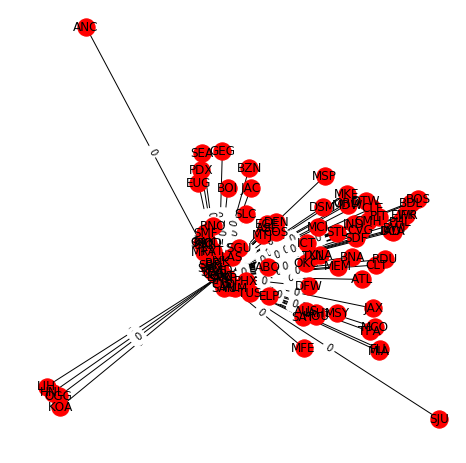

In [234]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = True)# with bug

## 2 Visualization for the GraphFlow

In [208]:
def analysis_2(sub_nodes,st_time,end_time,airport):
    sub_gf=gf.sub_graph_flow(st_time,end_time,sub_nodes)
    sub_gf.describe()
    sub_gf.draw_network_attr(with_pos = False)
    airports = list(sub_gf.G.succ[airport])
    
    
    lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == airport]
    lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['To'+ airport],data = 1)

    lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime), columns = ['ArrDTo' +airport],data = 1)

    lax_arrdelay_not_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) &
                                            (lax_pre_data.DepDelay <15)].AbsArrTime), columns = ['ArrD&DepNDTo' +airport],data = 1)

    lax_arrnotdelay_depdelay = pd.DataFrame(
        index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) &
                                            (lax_pre_data.DepDelay >15)].AbsArrTime), columns = ['DepD&NArrDTo' +airport],data = 1)

    lax_df = pd.concat([lax_arr, lax_arrdelay,lax_arrdelay_not_depdelay,lax_arrnotdelay_depdelay],sort = False).sort_index()
    
    dt = sub_gf.dt
    orgin_dfss = list(chain.from_iterable([orgin_dfs_gen(orgin_airport,lax_pre_data) for orgin_airport in airports ]))
    origin_lax_ts = pd.concat(orgin_dfss + [lax_df],sort = False).sort_index().groupby(pd.Grouper( freq= dt)).count()

    origin_lax_ts['Naive_1'] = origin_lax_ts[['EstArr'+airport for airport in airports ]].sum(axis = 1)

    origin_lax_ts['Naive_2_cheat']=origin_lax_ts['Naive_1'] + origin_lax_ts['ArrD&DepNDTo'+airport]-origin_lax_ts['DepD&NArrDTo'+airport]

    origin_lax_ts.iloc[:,:-2].plot(subplots=True, legend=True,figsize=(16,origin_lax_ts.shape[1]))
    #display(origin_lax_ts.head())
    origin_lax_ts[['ArrDTo'+airport,'Naive_1']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_1:',abs(origin_lax_ts['ArrDTo'+airport]-origin_lax_ts['Naive_1']).mean())
    origin_lax_ts[['ArrDTo'+airport,'Naive_2_cheat']].plot(subplots=False, legend=True,figsize=(16,2))
    print('mean error for Naive_2_cheat:',abs(origin_lax_ts['ArrDTo'+airport]-origin_lax_ts['Naive_2_cheat']).mean())

def orgin_dfs_gen(orgin_airport,lax_pre_data):
    origin_lax_pre_data = lax_pre_data[lax_pre_data.Origin == orgin_airport]
    ArrIndexDelay = pd.DataFrame(index = pd.to_datetime(
        origin_lax_pre_data.AbsArrTime[origin_lax_pre_data.DepDelay >15]),
                                                     columns = ['ArrIdxDD'+orgin_airport],data = 1).sort_index()
    #display(ArrIndexDelay.head())

    DepIndex = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime),
                                                columns = ['DepIdx'+orgin_airport],data = 1).sort_index()
    #display(DepIndex.head())

    DepIndexDepDelay = pd.DataFrame(index = pd.to_datetime(origin_lax_pre_data.AbsDepTime[origin_lax_pre_data.DepDelay >15]),
                                                        columns = ['DepIdxDD'+orgin_airport],data = 1).sort_index()
    #display(DepIndexDepDelay.head())

    mean_delay = origin_lax_pre_data[origin_lax_pre_data.DepDelay >15][['AirTime','TaxiIn','TaxiOut']].sum(axis = 1).mean()
    shift_dt = timedelta(seconds = round(mean_delay)*60) 
    shift_dt
    EstArrIndex =pd.DataFrame(index = DepIndexDepDelay.index.shift(periods = 1,freq = shift_dt), columns = ['EstArr'+orgin_airport],data = 1) 
    #display(EstArrIndex.head())
    
    orgin_dfs = [DepIndex,DepIndexDepDelay,ArrIndexDelay,EstArrIndex]
    return orgin_dfs

===============pre_data generated:  -2.0724267959594727
=========Testing  HNL ==========airports remains : 4 ========time lasted so far:  2.0814027786254883
loading finished: 0.0
AbsDepTime columnn generated: 0.001994609832763672
AbsArrTime columnn generated: 0.003989458084106445
data concated: 0.007978677749633789
fun_1_ts_gen ended: 0.007978677749633789
counter finished : 0.17353558540344238
counter finished : 0.039922237396240234
=========Testing  LAS ==========airports remains : 3 ========time lasted so far:  2.356666326522827
loading finished: 0.0
AbsDepTime columnn generated: 0.001996278762817383
AbsArrTime columnn generated: 0.003991127014160156
data concated: 0.006983280181884766
fun_1_ts_gen ended: 0.006983280181884766


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


counter finished : 0.12067699432373047
counter finished : 0.04488015174865723
=========Testing  LAX ==========airports remains : 2 ========time lasted so far:  2.5768649578094482
loading finished: 0.0
AbsDepTime columnn generated: 0.002992868423461914
AbsArrTime columnn generated: 0.00498652458190918
data concated: 0.010971546173095703
fun_1_ts_gen ended: 0.010971546173095703
counter finished : 0.17253899574279785
counter finished : 0.06183505058288574
=========Testing  OGG ==========airports remains : 1 ========time lasted so far:  2.8810513019561768
loading finished: 0.0
AbsDepTime columnn generated: 0.002992868423461914
AbsArrTime columnn generated: 0.004987239837646484
data concated: 0.012966632843017578
fun_1_ts_gen ended: 0.012966632843017578
counter finished :

C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars


 0.15657806396484375
counter finished : 0.02792525291442871
======================Total time: 3.1293880939483643
(337, 4)
(337, 4)
dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 4)


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:245: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


,HNL,LAS,LAX,OGG
2007-02-01 01:00:00-08:00,3,0,0,0
2007-02-01 02:00:00-08:00,1,1,0,1
2007-02-01 03:00:00-08:00,0,0,0,0


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
225514,2007,1,31,2135,422,-24,-5,OGG,LAX,272,2,13,2007-01-31 23:35:00-08:00,2007-02-01 04:22:00-08:00
226633,2007,1,31,2126,418,-28,-5,HNL,LAX,274,5,13,2007-01-31 23:26:00-08:00,2007-02-01 04:18:00-08:00
379685,2007,1,31,2246,620,-5,-9,HNL,LAS,432,8,14,2007-02-01 00:46:00-08:00,2007-02-01 06:20:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


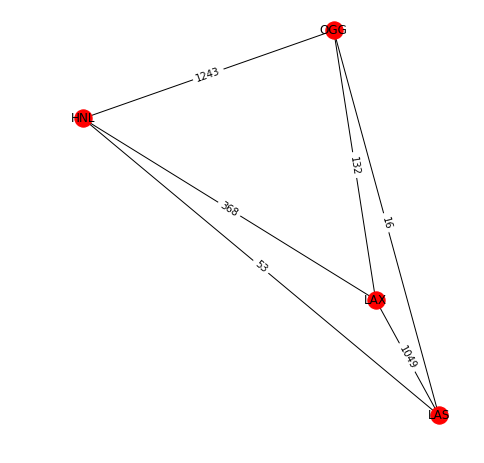

mean error for Naive_1: 0.27906976744186046
mean error for Naive_2_cheat: 0.18604651162790697


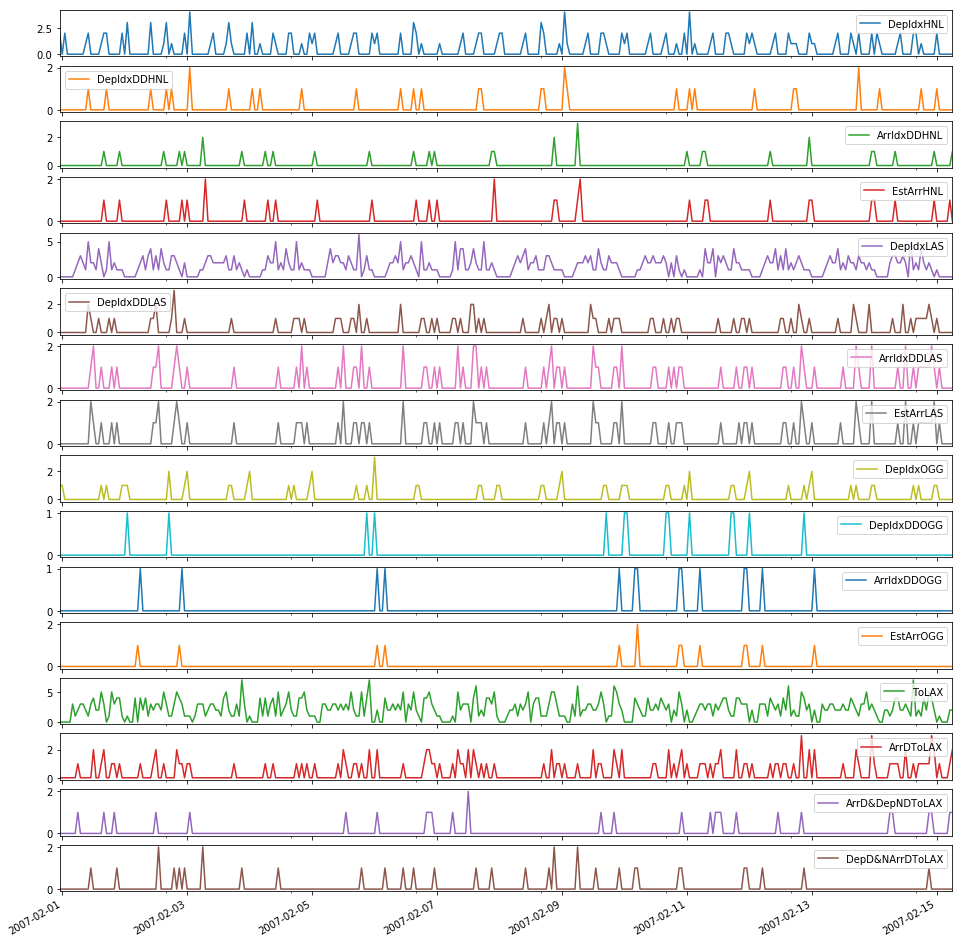

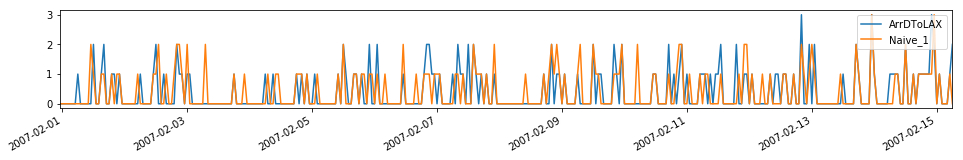

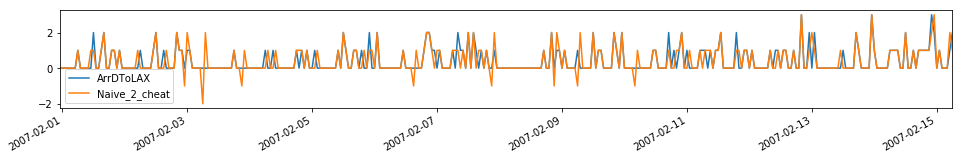

In [209]:
analysis_2(set(['LAX','LAS','OGG','HNL']),'2007-02-01 01:00:00','2007-02-15 01:00:00','LAX')

In [ ]:
sub_nodes=set(['LAX','LAS','OGG','HNL','ORD','DFW','DEN','JFK'])
sub_gf=gf.sub_graph_flow('2007-02-01 01:00:00','2007-02-15 01:00:00',sub_nodes)

dt : 1:00:00
start time: 2007-02-01 01:00:00-08:00
start time: 2007-02-15 01:00:00-08:00
All data frame has shape: (337, 8)


,DEN,DFW,HNL,JFK,LAS,LAX,OGG,ORD
2007-02-01 01:00:00-08:00,0,0,4,0,1,3,0,0
2007-02-01 02:00:00-08:00,0,0,1,1,1,0,1,3
2007-02-01 03:00:00-08:00,0,2,0,7,0,0,0,7


,Year,Month,DayofMonth,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,AirTime,TaxiIn,TaxiOut,AbsDepTime,AbsArrTime
224452,2007,1,31,1707,456,-14,-8,HNL,ORD,452,5,12,2007-01-31 19:07:00-08:00,2007-02-01 02:56:00-08:00
225099,2007,1,31,2319,722,66,69,LAX,JFK,278,9,16,2007-01-31 23:19:00-08:00,2007-02-01 04:22:00-08:00
225126,2007,1,31,2320,729,-11,-10,LAX,JFK,284,8,17,2007-01-31 23:20:00-08:00,2007-02-01 04:29:00-08:00


C:\Users\guoji\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


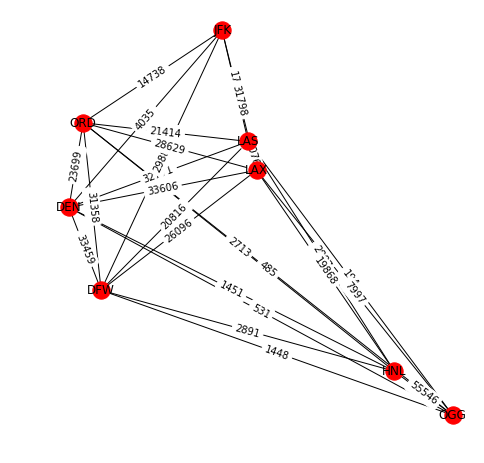

In [12]:
sub_gf.describe()
sub_gf.draw_network_attr(with_pos = False)

In [13]:
airports = list(sub_gf.G.succ['LAX'])

In [14]:
lax_pre_data = sub_gf.pre_data[sub_gf.pre_data.Dest == 'LAX']

In [15]:
lax_arr = pd.DataFrame(index = pd.to_datetime(lax_pre_data.AbsArrTime), columns = ['ArrLAX'],data = 1)

lax_arrdelay =  pd.DataFrame(index = pd.to_datetime(lax_pre_data[lax_pre_data.ArrDelay >15].AbsArrTime), columns = ['ArrDelay'+'LAX'],data = 1)

lax_arrdelay_not_depdelay = pd.DataFrame(
    index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay >15) &
                                        (lax_pre_data.DepDelay <15)].AbsArrTime), columns = ['ArrDelayNotDD'+'LAX'],data = 1)

lax_arrnotdelay_depdelay = pd.DataFrame(
    index = pd.to_datetime(lax_pre_data[(lax_pre_data.ArrDelay <15) &
                                        (lax_pre_data.DepDelay >15)].AbsArrTime), columns = ['ArrNotDelayDD'+'LAX'],data = 1)

lax_df = pd.concat([lax_arr, lax_arrdelay,lax_arrdelay_not_depdelay,lax_arrnotdelay_depdelay],sort = False).sort_index()

In [16]:
lax_df.head(7)

,ArrLAX,ArrDelayLAX,ArrDelayNotDDLAX,ArrNotDelayDDLAX
AbsArrTime,,,,
2007-02-01 01:14:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 01:14:00-08:00,NaN,1.0,NaN,NaN
2007-02-01 04:18:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 04:22:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 04:57:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 05:07:00-08:00,1.0,NaN,NaN,NaN
2007-02-01 06:25:00-08:00,1.0,NaN,NaN,NaN


,DepIdxDEN,DepIdxDDDEN,ArrIdxDDDEN,EstArrDEN,DepIdxDFW,DepIdxDDDFW,ArrIdxDDDFW,EstArrDFW,DepIdxHNL,DepIdxDDHNL,...,DepIdxORD,DepIdxDDORD,ArrIdxDDORD,EstArrORD,ArrLAX,ArrDelayLAX,ArrDelayNotDDLAX,ArrNotDelayDDLAX,Naive_1,Naive_2_cheat
2007-01-31 22:00:00-08:00,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-01-31 23:00:00-08:00,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-01 00:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-01 01:00:00-08:00,0,0,0,0,0,0,1,1,2,0,...,0,0,0,0,1,1,0,0,1,1
2007-02-01 02:00:00-08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


mean error for Naive_1: 0.7333333333333333
mean error for Naive_2_cheat: 0.4492753623188406


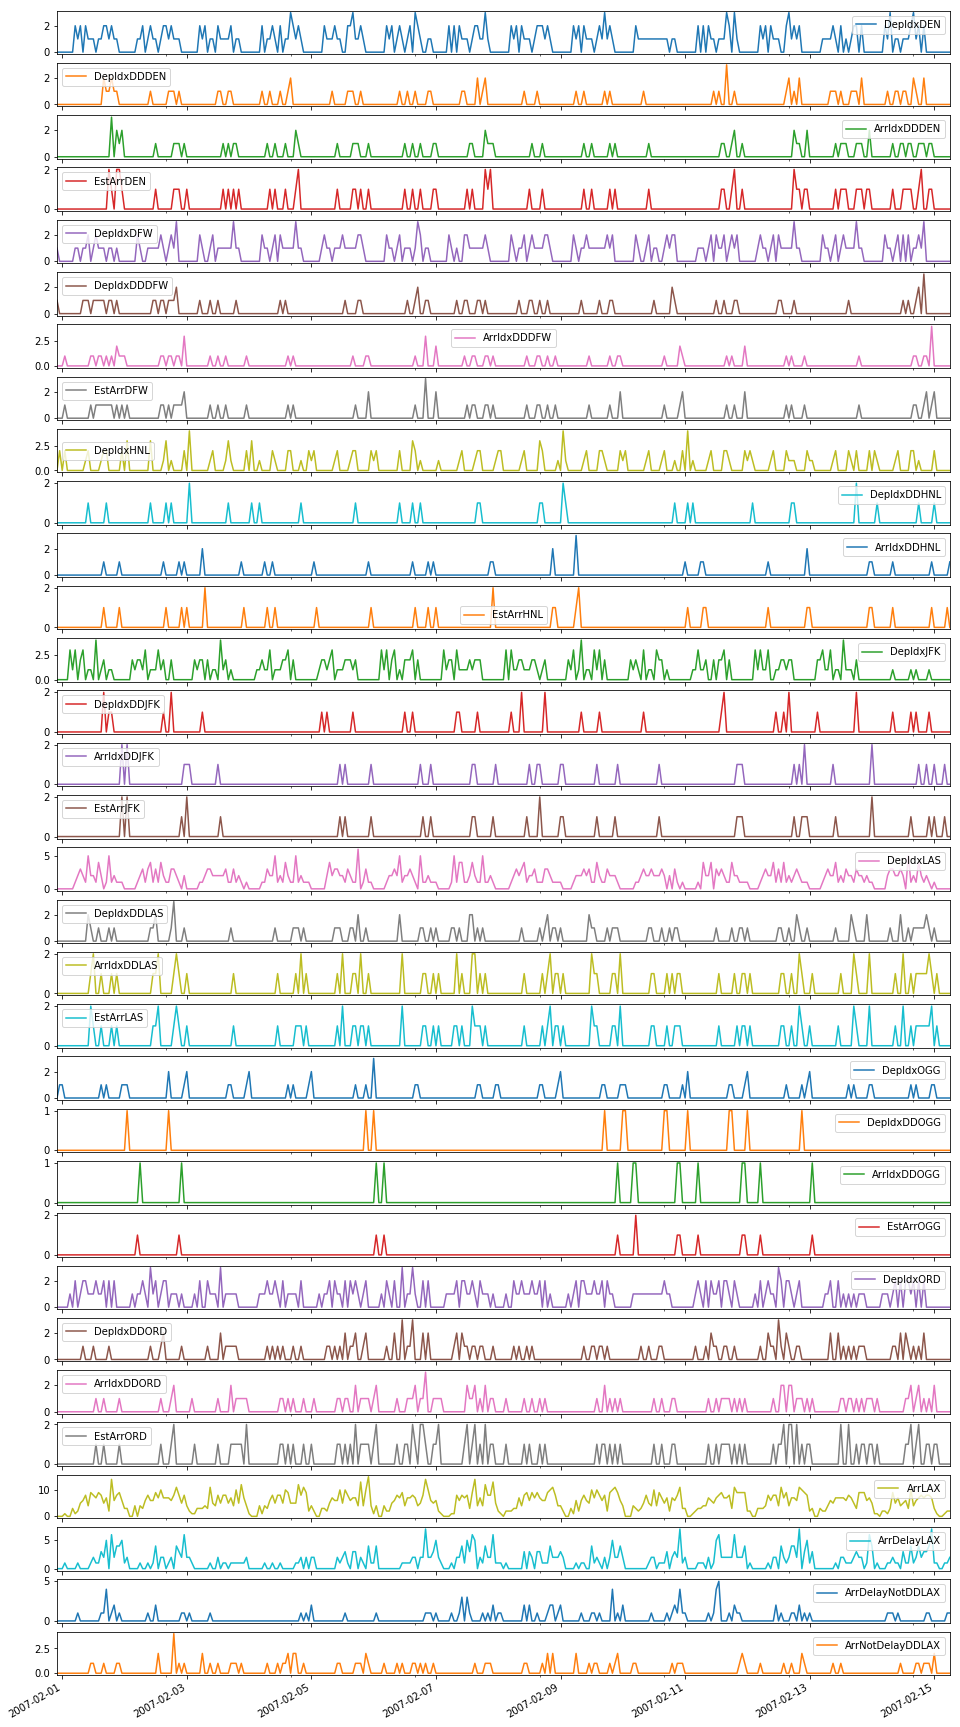

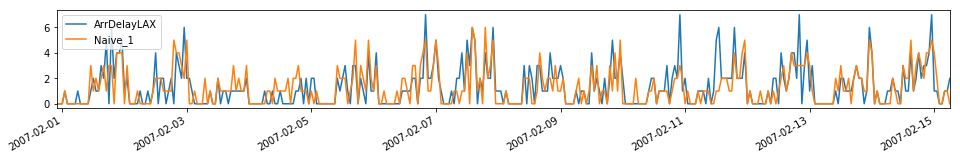

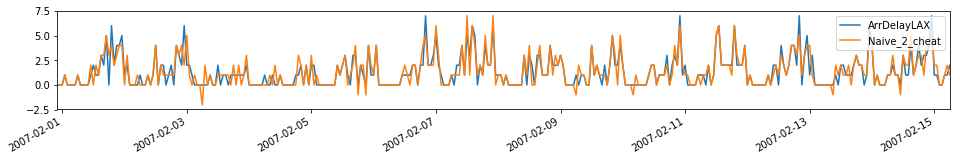

In [17]:
dt = sub_gf.dt
orgin_dfss = list(chain.from_iterable([orgin_dfs_gen(orgin_airport,lax_pre_data) for orgin_airport in airports ]))
origin_lax_ts = pd.concat(orgin_dfss + [lax_df],sort = False).sort_index().groupby(pd.Grouper( freq = dt)).count()

origin_lax_ts['Naive_1'] = origin_lax_ts[['EstArr'+airport for airport in airports ]].sum(axis = 1)

origin_lax_ts['Naive_2_cheat'] = origin_lax_ts['Naive_1'] + origin_lax_ts['ArrDelayNotDDLAX']-origin_lax_ts['ArrNotDelayDDLAX']

origin_lax_ts.iloc[:,:-2].plot(subplots = True, legend = True,figsize = (16,origin_lax_ts.shape[1]))
display(origin_lax_ts.head())
origin_lax_ts[['ArrDelayLAX','Naive_1']].plot(subplots = False, legend = True,figsize = (16,2))
print('mean error for Naive_1:',abs(origin_lax_ts['ArrDelayLAX']-origin_lax_ts['Naive_1']).mean())
origin_lax_ts[['ArrDelayLAX','Naive_2_cheat']].plot(subplots = False, legend = True,figsize = (16,2))
print('mean error for Naive_2_cheat:',abs(origin_lax_ts['ArrDelayLAX'] - origin_lax_ts['Naive_2_cheat']).mean())


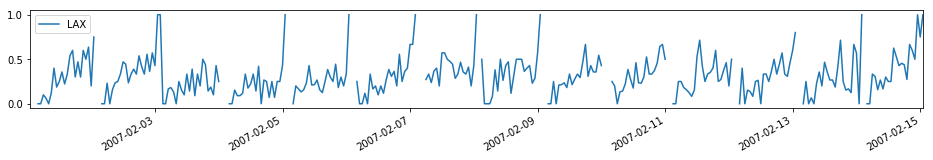

In [18]:
sub_gf.RealDelayRatio['LAX'].plot(legend=True,figsize=(16,2))

In [19]:
lax_test = lax_df.sort_index().groupby(pd.Grouper( freq = dt)).count()
lax_test.columns

Index(['ArrLAX', 'ArrDelayLAX', 'ArrDelayNotDDLAX', 'ArrNotDelayDDLAX'], dtype='object')

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = origin_lax_ts[['ArrLAX']]

model = pm.auto_arima(df.values, start_p = 1, start_q = 1,
                      test = 'adf',       # use adftest to find optimal 'd'
                      max_p = 3, max_q = 3, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, 
                      D = 0, 
                      trace = True,
                      error_action = 'ignore',  
                      suppress_warnings = True, 
                      stepwise = True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=1686.011, BIC=1701.385, Fit time=0.102 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1806.646, BIC=1814.333, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1699.184, BIC=1710.714, Fit time=0.023 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1741.592, BIC=1753.123, Fit time=0.023 seconds
Fit ARIMA: order=(2, 0, 1); AIC=1680.844, BIC=1700.062, Fit time=0.112 seconds
Fit ARIMA: order=(2, 0, 0); AIC=1678.878, BIC=1694.252, Fit time=0.040 seconds
Fit ARIMA: order=(3, 0, 1); AIC=1644.668, BIC=1667.729, Fit time=0.304 seconds
Fit ARIMA: order=(3, 0, 0); AIC=1680.782, BIC=1700.000, Fit time=0.073 seconds
Fit ARIMA: order=(3, 0, 2); AIC=1641.214, BIC=1668.119, Fit time=0.383 seconds
Fit ARIMA: order=(2, 0, 2); AIC=1670.015, BIC=1693.076, Fit time=0.174 seconds
Fit ARIMA: order=(3, 0, 3); AIC=1670.305, BIC=1701.054, Fit time=0.323 seconds
Total fit time: 1.590 seconds
                              ARMA Model Results                              
Dep. Variable:        

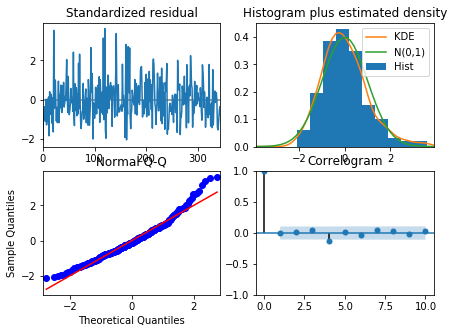

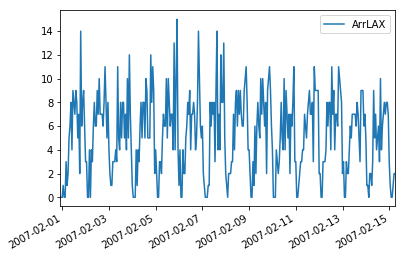

In [21]:
model.plot_diagnostics(figsize=(7,5))
df.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018413146630>,
      dtype=object)

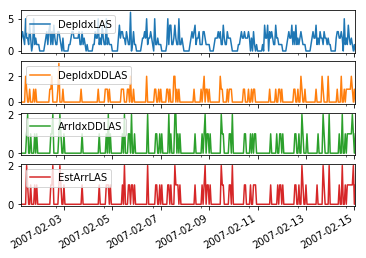

In [28]:
dt = sub_gf.dt
las_ts = pd.concat(orgin_dfs_gen('LAS',lax_pre_data),sort = False).sort_index().groupby(pd.Grouper( freq = dt)).count()
las_ts.plot(subplots = True,figure)